# Skin Cancer Prediction

Deep learning to predict the various skin diseases. The main objective of this project is to achieve maximum accuracy of skin disease prediction. Deep learning techniques helps in detection of skin disease at an initial stage. The feature extraction plays a key role in classification of skin diseases.The usage of Deep Learning algorithms reduces the need for human labor, such as manual feature extraction and data reconstruction for classification purpose. Moreover, Explainable AI is used to interpret the decisions made by our model.

## About the dataset
     HAM10000 ("Human Against Machine with 10000 training images") dataset - 
     a large collection of multi-source dermatoscopic images of pigmented lesions
     
     The dermatoscopic images are collected from different populations,acquired and stored by different modalities. 
     The final dataset consists of 10015 dermatoscopic images.
     
     It has 7 different classes of skin cancer which are listed below :

     1. Melanocytic nevi
     2. Melanoma
     3. Benign keratosis-like lesions
     4. Basal cell carcinoma
     5. Actinic keratoses
     6. Vascular lesions
     7. Dermatofibroma

In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob

In [2]:
#Reading the dataset
df = pd.read_csv(r'D:\Skin_disease_prediction\HAM10000_metadata.csv')

In [3]:
#Representing the dimension of the dataset
df.shape

(10015, 7)

In [4]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


### Check the data types of columns 
     The above df.info() command gives us the number of filled values along with the data types of columns.
     If we simply want to check the data type of a particular column, we can use the following command:

In [6]:
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [7]:
#Review the column names
df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [8]:
#Statistical properties of dataset
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


### Data Cleaning

In [9]:
#Checking the missing values
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

The feature 'age' consists of 57 null records. Thus, we need to replace them with the mean of 'age' since dropping 57 records would lead to loss of data.

In [10]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

In [11]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Now, the null values have been removed.

In [12]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = 'D:\Skin_disease_prediction'

# Merge images from both folders into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}


In [13]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,2


### Image Preprocessing
    Resizing of images because the original dimensions of images take long time to process in Neural Networks. 

In [14]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

Showcasing some samples of each class of the dataset in the images below:

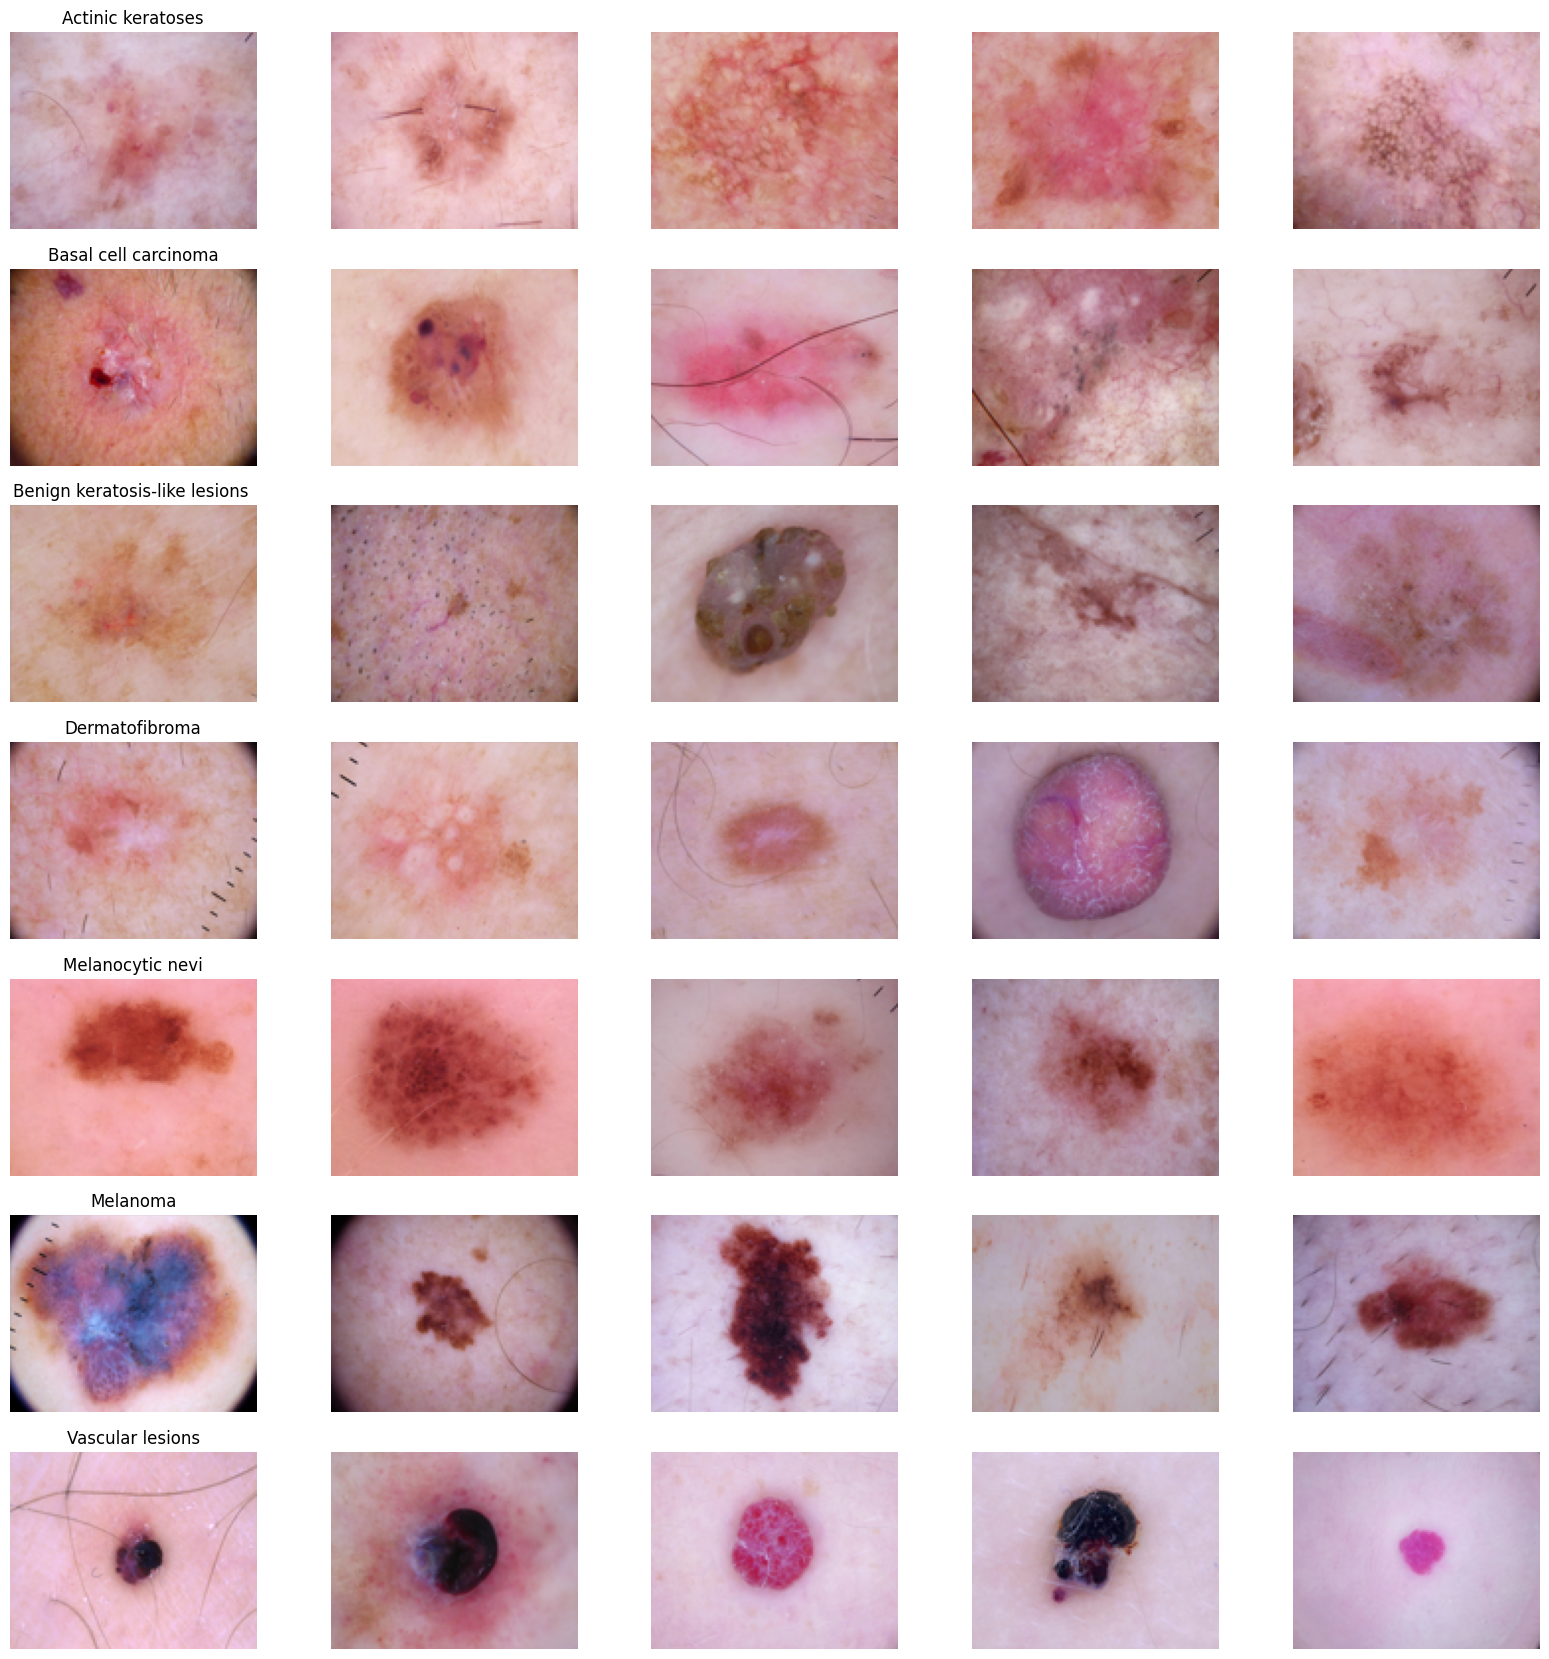

In [15]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [16]:
# See the image size distribution - should just return one row (all images are uniform)
df['image'].map(lambda x: x.shape).value_counts()

image
(100, 125, 3)    10015
Name: count, dtype: int64

## Exploratory Data Analysis
    Exploratory data analysis can help to detect obvious errors, identify outliers in datasets, understand relationships,           unearth important factors, find patterns within data, and provide new insights.

### Univariate Analysis

<Axes: title={'center': 'CELL TYPE'}, xlabel='cell_type', ylabel='Count'>

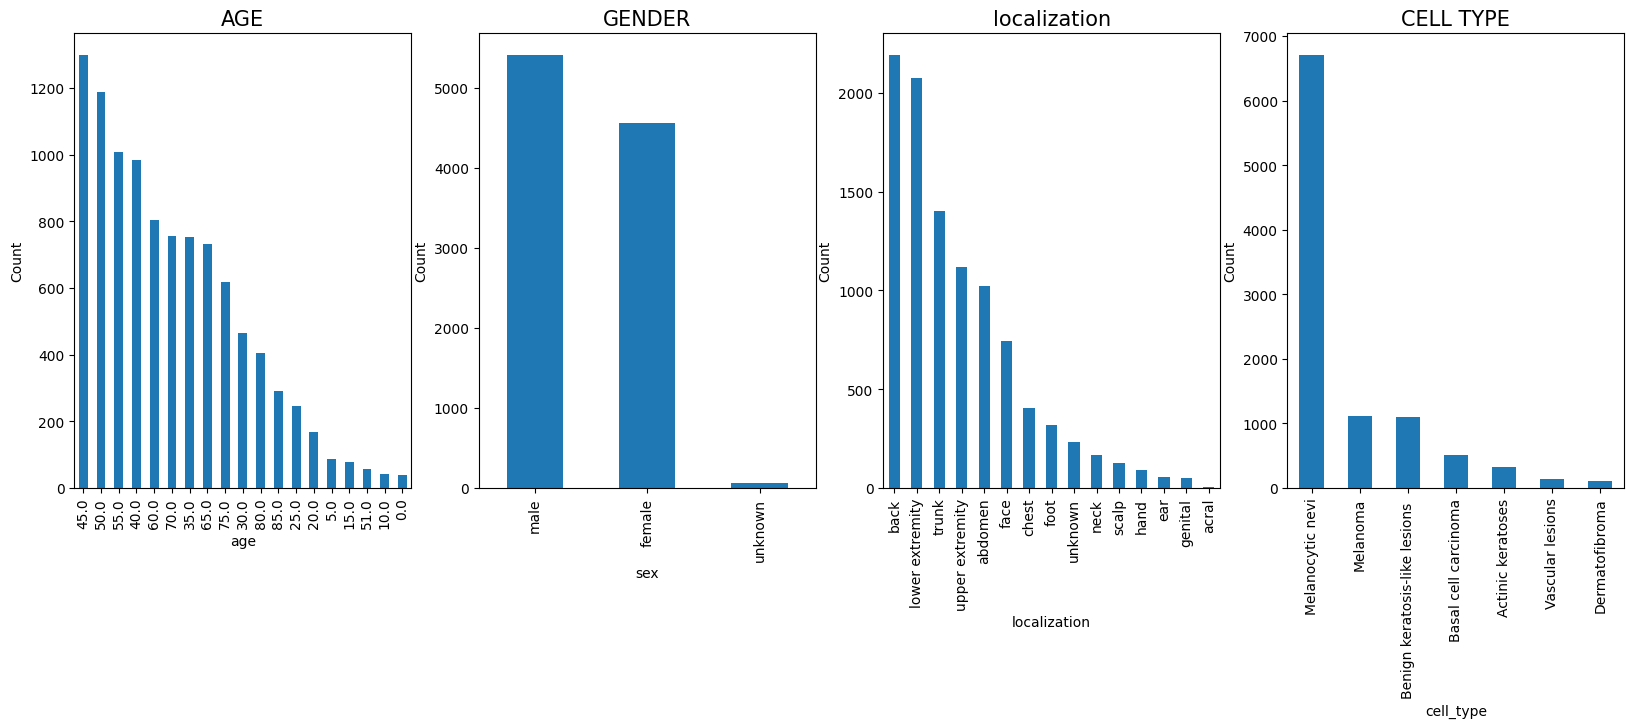

In [17]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()

1. Skin diseases are found to be maximum in people aged around 45. Minimum for 10 and below. We also observe that the probability of having skin disease increases with the increase in age.
2. Skin diseases are more prominent in Men as compared to Women and other gender.
3. Skin diseases are more visible on the "back" of the body and least on the "acral surfaces"(such as limbs, fingers, or ears).
4. The most found disease among people is Melanocytic nevi while the least found is Dermatofibroma.

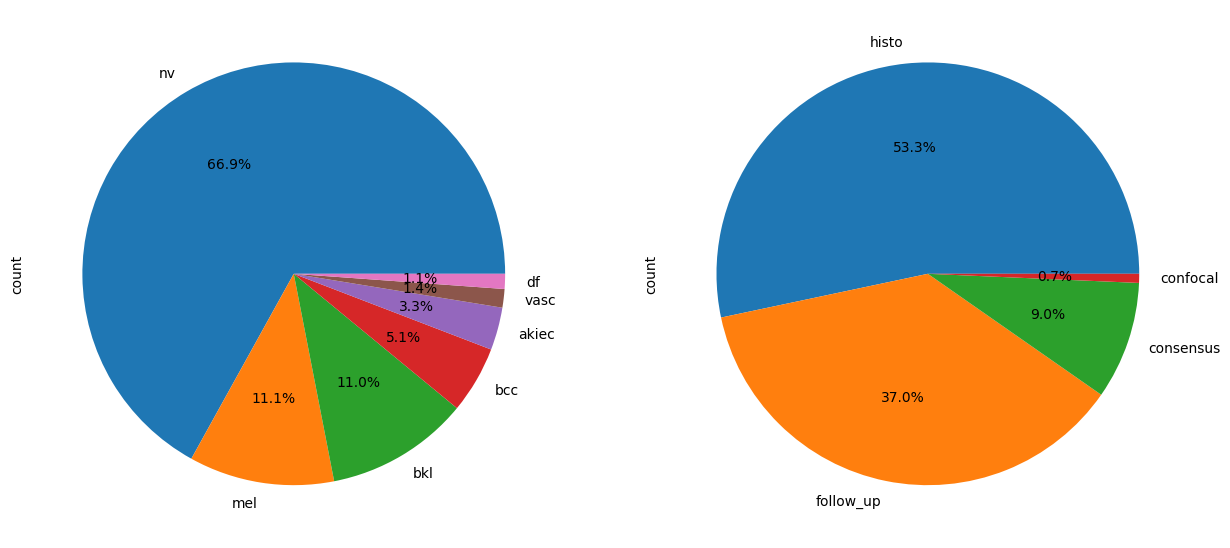

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### 1. Type of skin disease:

    nv: Melanocytic nevi - 69.9%
    mel: Melanoma - 11.1 %
    bkl: Benign keratosis-like lesions - 11.0%
    bcc: Basal cell carcinoma - 5.1%
    akiec: Actinic keratoses- 3.3%
    vasc: Vascular lesions-1.4%
    df: Dermatofibroma - 1.1%

#### 2. How the skin disease was discovered:
    histo - histopathology - 53.3%
    follow_up - follow up examination - 37.0%
    consensus - expert consensus - 9.0%
    confocal - confirmation by in-vivo confocal microscopy - 0.7% 

### Bivariate Analysis 

<Axes: title={'center': 'LOCALIZATION VS GENDER'}, xlabel='count', ylabel='localization'>

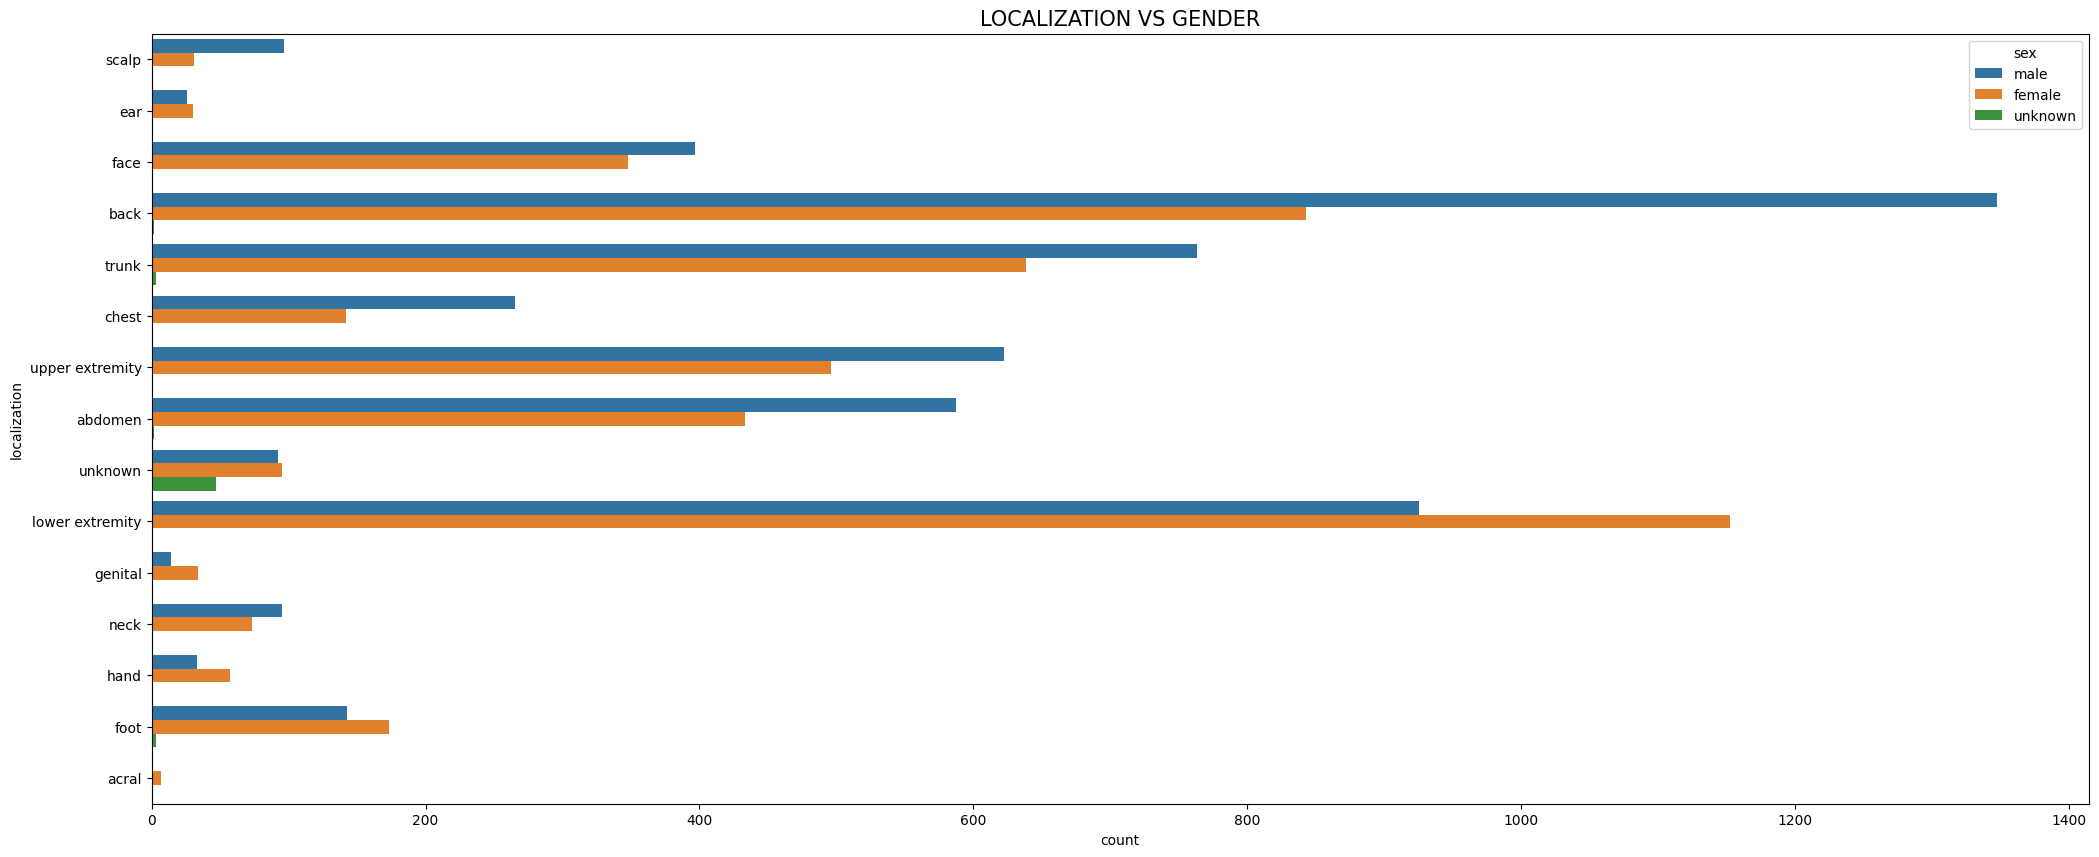

In [19]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)

1. Back is the most affected among people and more prominent in men.
2. Infection on Lower extremity of the body is more visible in women.
3. Some unknown regions also show infections and it's visible in men, women and other genders.
4. The acral surfaces show the least infection cases that too in men only. Other gender groups don't show this kind of infection.

<Axes: title={'center': 'LOCALIZATION VS CELL TYPE'}, xlabel='count', ylabel='localization'>

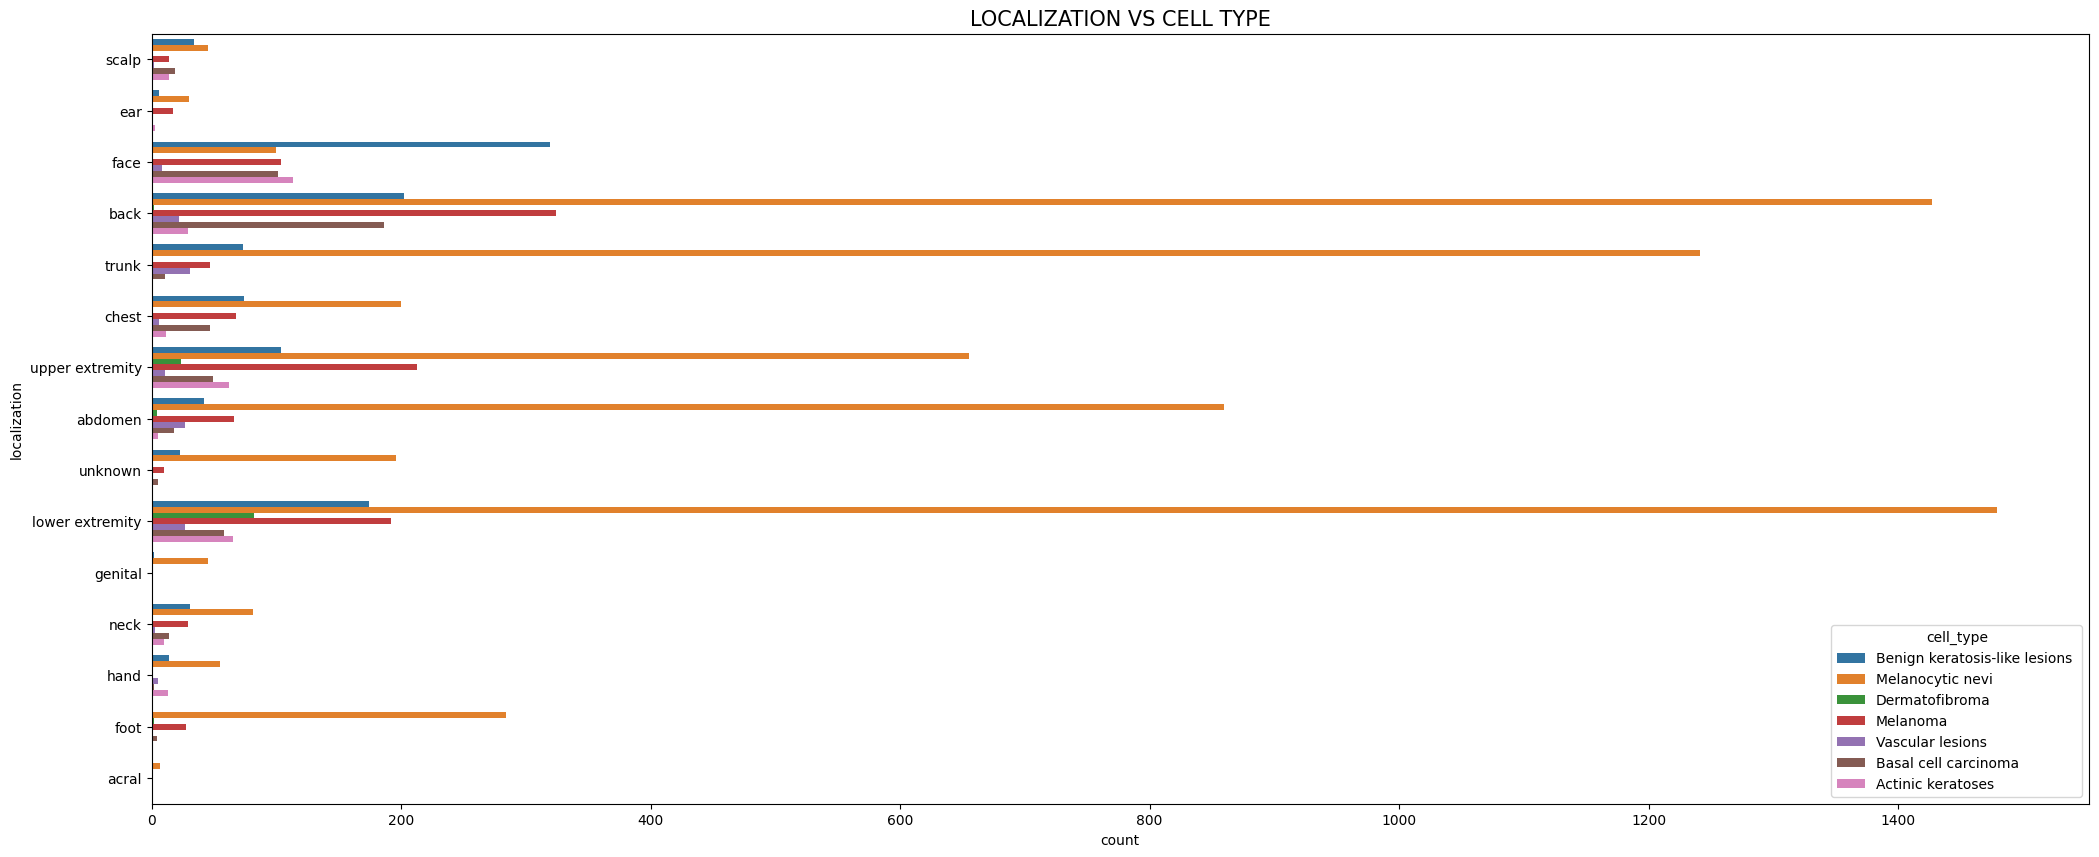

In [20]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS CELL TYPE',fontsize = 15)
sns.countplot(y='localization', hue='cell_type',data=df)

#
    1. The face is infected the most by Benign keratosis-like lesions.
    2. Body parts(except face) are infected the most by Melanocytic nevi.

<Axes: title={'center': 'GENDER VS CELL TYPE'}, xlabel='count', ylabel='sex'>

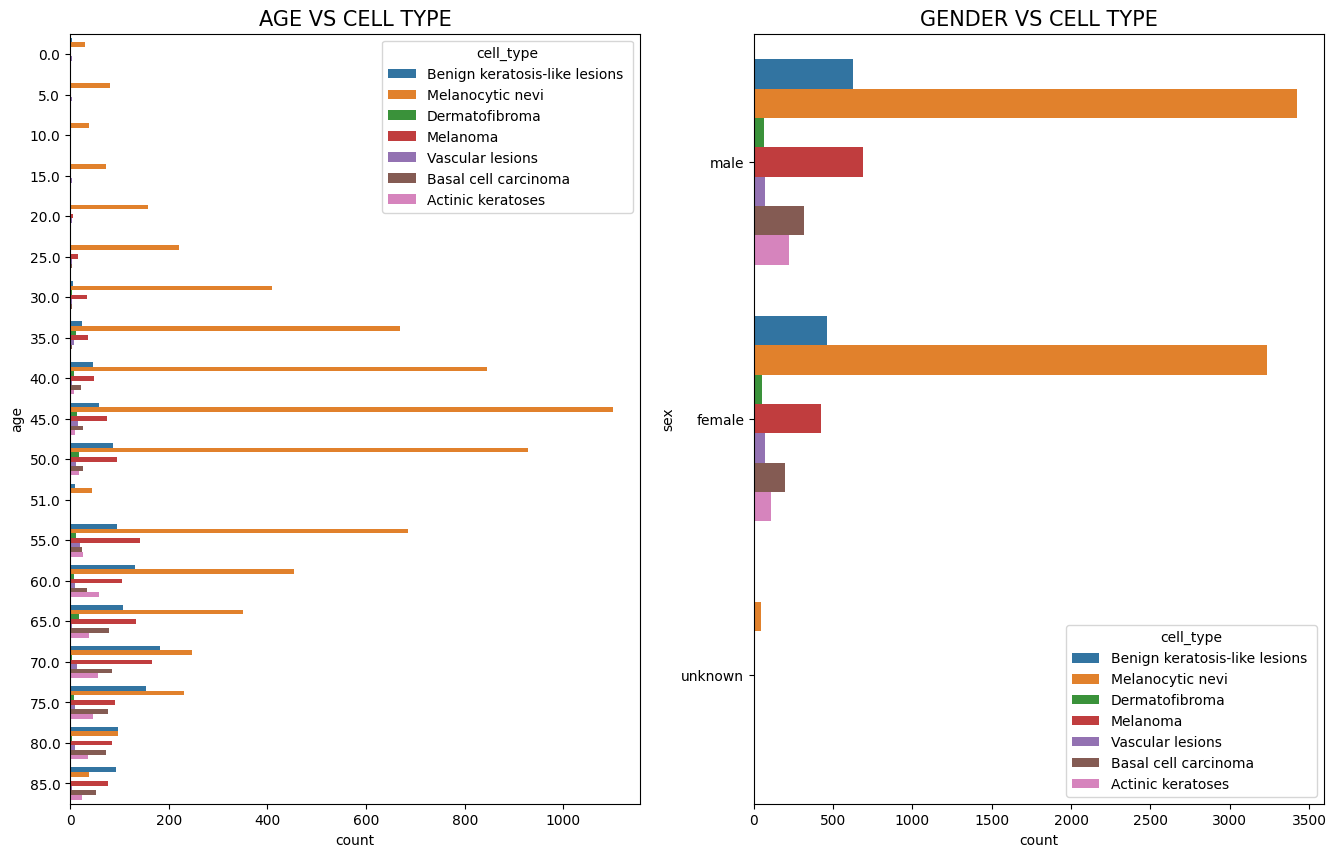

In [21]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('AGE VS CELL TYPE',fontsize = 15)
sns.countplot(y='age', hue='cell_type',data=df)
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='cell_type',data=df)

1. The age group between 0-75 years is infected the most by Melanocytic nevi. On the other hand, the people aged 80-90 are affected more by Benign keratosis-like lesions.

2. All the gender groups are affected the most by Melanocytic nevi.

In [22]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Artificial Neural Network(ANN)
The Artificial Neural Network (ANN) is a deep learning method that arose from the concept of the human brain Biological Neural Networks. The development of ANN was the result of an attempt to replicate the workings of the human brain.

A simple neural network is implemented first with the following layers to get patterns in images:

In [23]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [24]:
features.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,D:\Skin_disease_prediction\HAM10000_images_par...,Benign keratosis-like lesions,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


In [25]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Vascular lesions', b'Benign keratosis-like lesions ',
       b'Actinic keratoses', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7511,), dtype=int32, numpy=array([0, 1, 0, ..., 1, 0, 0])>)

In [26]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [27]:
# Perform one-hot encoding on the labels --> it transforms categorical data into numerical data.
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [28]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)

# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

In [29]:
x_train = x_train.reshape(6759,125*100*3)
x_test = x_test.reshape(2504,125*100*3)
print(x_train.shape)
print(x_test.shape)

(6759, 37500)
(2504, 37500)


In [30]:
# define the keras model
model = Sequential()

model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 37500))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                    beta_1 = 0.9,
                                    beta_2 = 0.999,
                                    epsilon = 1e-8)

# compile the keras model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# fit the keras model on the dataset
history = model.fit(x_train, y_train, batch_size = 10, epochs = 10)

accuracy = model.evaluate(x_test, y_test, verbose=1)[1]
print("Test: accuracy = ",accuracy*100,"%")

Epoch 1/10
676/676 [==============================] - 27s 35ms/step - loss: 0.9722 - accuracy: 0.6708
Epoch 2/10
676/676 [==============================] - 18s 27ms/step - loss: 0.8953 - accuracy: 0.6858
Epoch 3/10
676/676 [==============================] - 23s 34ms/step - loss: 0.8484 - accuracy: 0.7016
Epoch 4/10
676/676 [==============================] - 22s 32ms/step - loss: 0.8173 - accuracy: 0.7075
Epoch 5/10
676/676 [==============================] - 24s 35ms/step - loss: 0.7929 - accuracy: 0.7161
Epoch 6/10
676/676 [==============================] - 21s 31ms/step - loss: 0.7675 - accuracy: 0.7223
Epoch 7/10
676/676 [==============================] - 22s 33ms/step - loss: 0.7340 - accuracy: 0.7329
Epoch 8/10
676/676 [==============================] - 22s 33ms/step - loss: 0.7087 - accuracy: 0.7406
Epoch 9/10
676/676 [==============================] - 22s 33ms/step - loss: 0.6830 - accuracy: 0.7522
Epoch 10/10
79/79 [==============================] - 2s 24ms/step - loss: 0.8688 -

# Convolutional Neural Network(CNN)
CNN is a kind of network architecture for deep learning algorithms and is specifically used for image recognition.

### Applied Data augmentation using ImageDatagenerator before model training
Since the data is less, we apply data augmentation using ImageDataGenerator.

ImageDataGenerator generates augmentation of images in real-time while the model is still training. One can apply any random transformations on each training image as it is passed to the model.

The CNN model is a repeated network of the following layers:
1. Convolutional
2. Pooling
3. Dropout
4. Flatten
5. Dense

Optimizer: Adam

Activation function used: Softmax

In [32]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*3 -> Flatten -> Dense*2 -> Dropout -> Out
input_shape = (100, 125, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.16))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same'))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 125, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 125, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 62, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 62, 32)        9248      
                                                      

In [34]:
# Define the optimizer
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

C:\Users\LENOVO T480\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [35]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [36]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [37]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [38]:
# Fit the model
epochs = 10
batch_size = 16
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

from tensorflow.keras.metrics import Recall
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\LENOVO T480\AppData\Local\Temp\ipykernel_4232\4291424120.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/10
380/380 [==============================] - 123s 316ms/step - loss: 1.0581 - accuracy: 0.6705 - val_loss: 1.0566 - val_accuracy: 0.6450 - lr: 1.0000e-04
Epoch 2/10
380/380 [==============================] - 121s 318ms/step - loss: 0.9515 - accuracy: 0.6713 - val_loss: 1.0361 - val_accuracy: 0.6657 - lr: 1.0000e-04
Epoch 3/10
380/380 [==============================] - 119s 313ms/step - loss: 0.8994 - accuracy: 0.6783 - val_loss: 0.8993 - val_accuracy: 0.6672 - lr: 1.0000e-04
Epoch 4/10
380/380 [==============================] - 123s 323ms/step - loss: 0.8607 - accuracy: 0.6900 - val_loss: 0.8649 - val_accuracy: 0.6775 - lr: 1.0000e-04
Epoch 5/10
380/380 [==============================] - 121s 318ms/step - loss: 0.8409 - accuracy: 0.6970 - val_loss: 0.8418 - val_accuracy: 0.6864 - lr: 1.0000e-04
Epoch 6/10
380/380 [==============================] - 119s 313ms/step - loss: 0.8024 - accuracy: 0.7003 - val_loss: 0.8053 - val_accuracy: 0.7101 - lr: 1.0000e-04
Epoch 7/10
380/380 [==

In [41]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

22/22 [==============================] - 2s 101ms/step - loss: 0.7767 - accuracy: 0.7382
Validation: accuracy = 0.738166  ;  loss_v = 0.776680
Test: accuracy = 0.735224  ;  loss = 0.759309
